In [1]:
import sympy as sp

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from scipy.linalg import eigh_tridiagonal

In [5]:
# Following: https://youtu.be/ay0zZ8SUMSk

In [6]:
# Find psi_1 to psi_{N - 1}, excluding psi_0 = 0 and psi_N = 0

In [7]:
defaultScalingFactor : float = 1000

In [8]:
defaultReducedPlancksConstant : float = 1

In [9]:
defaultMass : float = 1

In [10]:
defaultLength : float = 1

In [11]:
defaultUnormalizedPositionStep : float = 1e-3

In [40]:
def unormalizedPotentialTerm(
            potentialsOrPotentialFunction, 
            normalizedPositions : np.array, 
            length : float = defaultLength, 
            mass : float = defaultMass, 
            scalingFactor : float = defaultScalingFactor
        ) -> np.array: 
    potentials : np.array = potentialsOrPotentialFunction
    if callable(potentialsOrPotentialFunction) == True: 
        potentials = potentialsOrPotentialFunction(normalizedPositions - length / 2.0)
    return (length ** 2) * mass * potentials * scalingFactor

In [41]:
def makeEigenMatrixTerms(
            potential : np.array, 
            normalizedStep : float
        ) -> tuple[np.array, np.array]: 
    inverseNormalizedStepSquared : float = 1.0 / (normalizedStep ** 2)
    return (potential + inverseNormalizedStepSquared, -inverseNormalizedStepSquared / 2.0 * np.ones(len(potential)))

In [42]:
def makeEigenFunctions(
            potential : np.array, 
            normalizedStep : float, 
        ) -> tuple[np.array, np.ndarray]: 
    pointCount = len(potential)
    assert pointCount > 2, "Need at least 3 points to create eigen matrix"
    potentialTerm, stepTerm = makeEigenMatrixTerms(potential, normalizedStep)
    return eigh_tridiagonal(potentialTerm[ : -1], stepTerm[1 : -1])

In [43]:
def finiteSquareWell(
            normalizedPosition : np.array, 
            potentialHeight : float, 
            length : float
        ) -> np.array: 
    potentials = np.zeros(len(normalizedPosition))
    potentials =  np.where(
            normalizedPosition > (length / 3.0), 
            potentials, 
            potentialHeight
        )
    potentials =  np.where(
            normalizedPosition < (2.0 * length / 3.0), 
            potentials, 
            potentialHeight
        )
    return potentials

In [44]:
reducedPlanckConstant : float = defaultReducedPlancksConstant

In [45]:
length : float = defaultLength

In [46]:
positionStep : float = defaultUnormalizedPositionStep

In [47]:
mass : float = defaultMass

In [48]:
normalizedPositions : np.array = np.arange(0, length, positionStep) / length

In [49]:
normalizedPositionStep = 1.0 / len(normalizedPositions)

In [50]:
scalar : float = defaultScalingFactor

In [51]:
pointCount : int = len(normalizedPositions + 1)

In [52]:
potential = unormalizedPotentialTerm(
        finiteSquareWell(normalizedPositions, 1.0, length), 
        normalizedPositions, 
        length, 
        mass, 
        scalar
    )

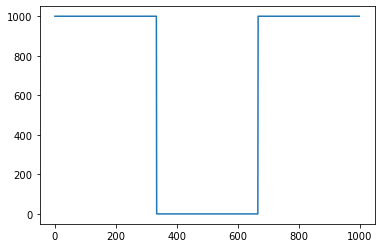

In [53]:
plt.plot(potential)

In [54]:
eigenValues, eigenFunctions = makeEigenFunctions(potential, normalizedPositionStep)

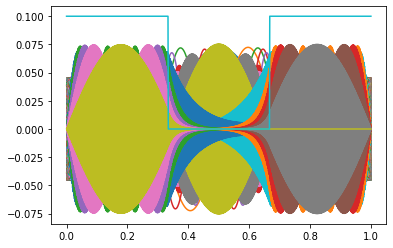

In [71]:
for eigenFunction in eigenFunctions.T:
     plt.plot(normalizedPositions[1:], eigenFunction)
plt.plot(normalizedPositions, potential / scalar / 10)


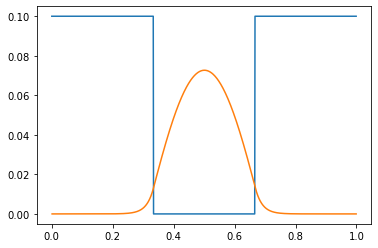

In [61]:
plt.plot(normalizedPositions, potential / scalar / 10)
plt.plot(normalizedPositions[1:], eigenFunctions.T[0])

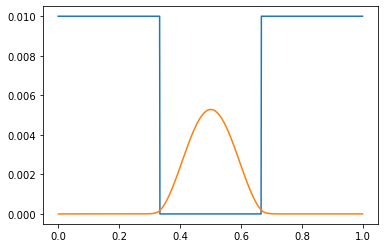

In [68]:
plt.plot(normalizedPositions, potential / scalar / 100)
plt.plot(normalizedPositions[1:], eigenFunctions.T[0] ** 2)